**Python solutions to Gary Koop's "Analysis of Economic Data" (4th ed., 2013)**

**Chapter 3: Correlation**

Jakub Janus, [jakub.janus@uek.krakow.pl](jakub.janus@uek.krakow.pl)

# Exercise 3.1
(a) Using the data in FOREST.XLS, calculate and interpret the mean, standard deviation, minimum and maximum of deforestation and population density.

In [1]:
import pandas as pd
forest = pd.read_excel(r'datasets\FOREST.xls')

print('deforestation_mean = ', forest['Forest loss'].mean(), '\n'
      'deforestation_std = ', forest['Forest loss'].std(), '\n'
      'deforestation_min = ', forest['Forest loss'].min(), '\n'
      'deforestation_max = ', forest['Forest loss'].max(), '\n'
      'population_density_mean = ', forest['Pop dens'].mean(), '\n'
      'population_density_std = ', forest['Pop dens'].std(), '\n'
      'population_density_min = ', forest['Pop dens'].min(), '\n'
      'population_density_max = ', forest['Pop dens'].max())

deforestation_mean =  1.1385714285714286 
deforestation_std =  0.9281886454221916 
deforestation_min =  0.0 
deforestation_max =  5.3 
population_density_mean =  639.427 
population_density_std =  726.3399771803076 
population_density_min =  0.89 
population_density_max =  2769.0


(b) Verify that the correlation between these two variables is 0.66.

In [2]:
correlation = forest['Forest loss'].corr(forest['Pop dens'])
print('correlation = ', round(correlation, 2))

correlation =  0.66


# Exercise 3.2
(a) Using the data in HPRICE.XLS, calculate and interpret the mean, standard deviation, minimum and maximum of Y (house price, labeled “sale price” in the file), X (lot size) and Z (number of bedrooms, labeled “#bedroom”).

In [3]:
hprice = pd.read_excel(r'datasets\HPRICE.xls')
#using Pandas descriptive statistics
hprice[['sale price', 'lot size', '#bedroom']].describe()

,sale price,lot size,#bedroom
count,546.000000,546.000000,546.000000
mean,68121.597070,5150.265568,2.965201
std,26702.670926,2168.158725,0.737388
min,25000.000000,1650.000000,1.000000
25%,49125.000000,3600.000000,2.000000
50%,62000.000000,4600.000000,3.000000
75%,82000.000000,6360.000000,3.000000
max,190000.000000,16200.000000,6.000000


(b) Verify that the correlation between X and Y is as given in the example. Repeat for X and Z and then for Y and Z.

In [4]:
X = hprice['sale price']
Y = hprice['lot size']
Z = hprice['#bedroom']
cor_X_Y = X.corr(Y)
cor_X_Z = X.corr(Z)
cor_Y_Z = Y.corr(Z)
print('cor_X_Y =', round(cor_X_Y, 2) , '\n'
      'cor_X_Z =', round(cor_X_Z, 2) , '\n'
      'cor_Y_Z =', round(cor_Y_Z, 2))

cor_X_Y = 0.54 
cor_X_Z = 0.37 
cor_Y_Z = 0.15


(c) Now add a new variable, W, the number of bathrooms (labeled “#bath”). Calculate the mean of W.

In [5]:
W = hprice['#bath']
print('W_mean = ', W.mean())

W_mean =  1.2857142857142858


(d) Calculate and interpret the correlation between W and Y. Discuss to what extent it can be said that W causes Y.

In [6]:
cor_W_Y = W.corr(Y)
print('cor_W_Y =', round(cor_W_Y, 2))

cor_W_Y = 0.19


(e) Repeat part (d) for W and X and then for W and Z.

In [7]:
cor_W_X = W.corr(X)
print('cor_W_X =', round(cor_W_X, 2))
cor_W_Z = W.corr(Z)
print('cor_W_Z =', round(cor_W_Z, 2))

cor_W_X = 0.52
cor_W_Z = 0.37


# Exercise 3.4
The file EX34.XLS contains four variables: Y, X1, X2 and X3.

(a) Calculate the correlation between Y and X1. Repeat for Y and X2, and for Y
and X3.

In [8]:
ex34 = pd.read_excel(r'datasets\EX34.xls')
cor_Y_X1 = ex34['Y'].corr(ex34['X1'])
cor_Y_X2 = ex34['Y'].corr(ex34['X2'])
cor_Y_X3 = ex34['Y'].corr(ex34['X3'])
print('cor_Y_X1 =', round(cor_Y_X1, 2) , '\n'
     'cor_Y_X2 =', round(cor_Y_X2, 2) , '\n'
     'cor_Y_X3 =', round(cor_Y_X3, 2))

cor_Y_X1 = -0.01 
cor_Y_X2 = -0.72 
cor_Y_X3 = -1.0


(b) Create an XY-plot involving Y and X1. Repeat for Y and X2, and for Y
and X3.

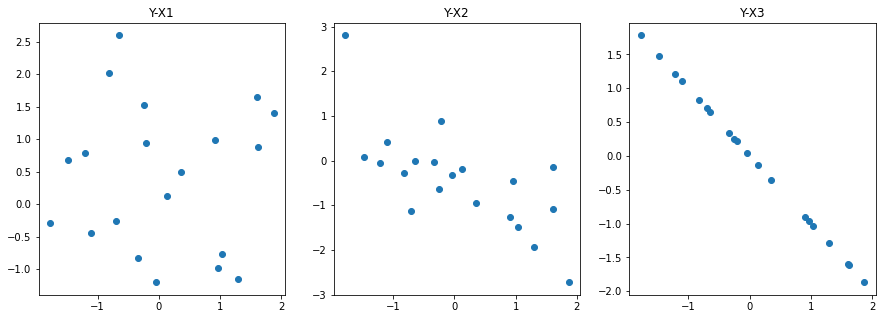

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, axs = plt.subplots(1, 3, figsize = (15,5))
axs[0].scatter(ex34['Y'], ex34['X1'])
axs[0].set_title('Y-X1')
axs[1].scatter(ex34['Y'], ex34['X2'])
axs[1].set_title('Y-X2')
axs[2].scatter(ex34['Y'], ex34['X3'])
axs[2].set_title('Y-X3')
plt.show()

# Exercise 3.5
(a) Using the data in FOREST.XLS, calculate and interpret a correlation matrix
involving deforestation, population density, change in pasture and change in
cropland.

In [10]:
#matrix
forest_cor_matrix = forest.corr()
forest_cor_matrix

,Forest loss,Pop dens,Crop ch,Pasture ch
Forest loss,1.000000,0.659150,-0.052436,0.301605
Pop dens,0.659150,1.000000,-0.126898,0.088625
Crop ch,-0.052436,-0.126898,1.000000,0.248937
Pasture ch,0.301605,0.088625,0.248937,1.000000


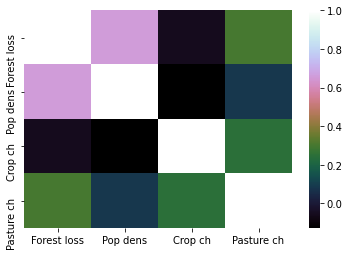

In [11]:
#heatmap
import seaborn as sns
sns.heatmap(forest_cor_matrix, cmap = "cubehelix")
plt.show()

(b) Calculate and interpret a correlation matrix using the following variables in
the data set HPRICE.XLS: house price, lot size, number of bedrooms, number
of bathrooms and number of stories. How many individual correlations have
you calculated?

In [12]:
hprice_selected = hprice[['sale price', 'lot size', '#bedroom', '#bath', '#stories']]
hprice_selected_cor_matrix = hprice_selected.corr()
hprice_selected_cor_matrix

,sale price,lot size,#bedroom,#bath,#stories
sale price,1.000000,0.535796,0.366447,0.516719,0.421190
lot size,0.535796,1.000000,0.151851,0.193833,0.083675
#bedroom,0.366447,0.151851,1.000000,0.373769,0.407974
#bath,0.516719,0.193833,0.373769,1.000000,0.324066
#stories,0.421190,0.083675,0.407974,0.324066,1.000000


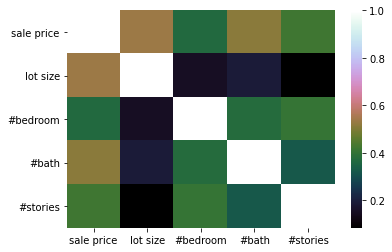

In [13]:
sns.heatmap(hprice_selected_cor_matrix, cmap = "cubehelix")
plt.show()